# CS4662 Lab Assignment 1 - Sana Shaikh

### 1- Read the dataset file “Cancer.csv” (from github using the following command), and assign it to a Pandas DataFrame: df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv"). Check out the dataset. As you see, the dataset includes 9 numerical features. The last column is the binary label (“1” means it is a malignant cancer, “0” means it is a benign   tumor). You will use all 9 features in this homework.



In [78]:
import pandas as pd
import numpy as np

In [79]:
cancer_df = pd.read_csv('https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv')

# checkout the dataset
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [80]:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']

# print the first 5 rows
print(X.head())
print(y.head())

   Clump_Thickness  Uniformity_of_Cell_Size  Uniformity_of_Cell_Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  
0                3                1        1  
1                3                2        1  
2                3     

### 2- Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.3, random_state=2.

In [81]:
from sklearn.model_selection import train_test_split


# Splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(105, 9)
(105,)
(45, 9)
(45,)


### 3- Use “Decision Tree Classifier” to predict Cancer based on the training/testing datasets that you built in part (h). Then, calculate and report the accuracy and AUC of your classifier. Later in part (g), you will plot the ROC curve as well. Use this command to define your tree: my_DecisionTree = DecisionTreeClassifier(random_state=2).

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics


my_decisiontree = DecisionTreeClassifier(random_state=2)

# this trains the model only on the training dataset that we split above
my_decisiontree.fit(X_train, y_train)
my_dt_predict = my_decisiontree.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
my_dt_predict_prob = my_decisiontree.predict_proba(X_test)

In [83]:
# Now, testing the accuracy
dt_accuracy_score = accuracy_score(y_test, predict)
print("Accuracy score using Decision Tree Classifier: ", dt_accuracy_score)

Accuracy score using Decision Tree Classifier:  0.8666666666666667


In [84]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(predict)


6      0
3      0
113    1
12     1
24     1
129    1
25     1
108    1
128    0
45     1
48     1
42     1
35     1
5      1
85     1
54     1
41     0
96     0
144    0
89     1
77     0
74     0
115    0
94     0
87     1
29     1
2      0
127    0
44     0
125    1
126    0
23     1
64     1
117    0
84     1
14     1
132    1
91     1
53     1
141    0
78     1
97     1
143    0
93     1
11     1
Name: Malignant_Cancer, dtype: int64
[0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1]


In [85]:
from sklearn import metrics

dt_fpr, dt_tpr, dt_thresholds = metrics.roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)

print("FPR =", dt_fpr)
print("TPR =", dt_tpr)

dt_AUC = metrics.auc(dt_fpr, dt_tpr)
print("DT_AUC =", dt_AUC)

FPR = [0.         0.11764706 1.        ]
TPR = [0.         0.85714286 1.        ]
DT_AUC = 0.8697478991596639


### 4- Now, we want to perform “Bagging” based on 29 “base decision tree classifiers”.

Note: you should write your own code to perform Bagging (don’t use scikit-learn functions for Bagging!)

To do so, you need to perform bootstrapping first. You can write a “for” loop with loop variable i=0…18.  In each iteration of the loop, you have to:

make a bootstarp sample of the original “Training” Dataset (build in part(b)) with size of bootstarp_size = 0.8*(Size of the original dataset). You can use the following command to generate a random bootstrap dataset (“i" is the variable of the loop, so the random_state changes in each iteration):
resample(X_train, n_samples = bootstarp_size , random_state=i , replace = True)

Define and train a new base decision tree classifier on this dataset in each iteration:
Base_DecisionTree = DecisionTreeClassifier(random_state=2).

Test “this base classifier” on the original “Testing” Dataset build in part(b), and save the prediction results for all testing samples.
 

Then, Perform Voting to make the final decision on each data sample based on the votes of all 29 classifiers. Finally, calculate and report the accuracy and AUC of your Bagging method.

NOTE: You need to calculate the probability of “malignant cancer” to be able to find AUC and plot the ROC curve. As mentioned in the class, you can consider the average (mean) of the votes as the probability for each sample.

In [86]:
from sklearn.utils import resample

base_dt_predictions = []
bootstarp_size = int(0.8 * len(X_train))

for i in range(29):
    X = resample(X_train, n_samples = bootstarp_size, random_state = i, replace = True)
    y = resample(y_train, n_samples = bootstarp_size, random_state = i, replace = True)
    
    Base_DecisionTree = DecisionTreeClassifier(random_state = 2)
    Base_DecisionTree.fit(X, y)
    
    #testing only on testing set
    Base_DecisionTree_predict = Base_DecisionTree.predict(X_test)
    
    base_dt_predictions.append(Base_DecisionTree_predict)

In [87]:
bagging_accuracy_score = accuracy_score(y_test, Base_DecisionTree_predict)
print("Tree Accuracy Score for bagging is: ", bagging_accuracy_score)

bagging_predict_prob = Base_DecisionTree.predict_proba(X_test)

bag_fpr, bag_tpr, bag_thresholds = metrics.roc_curve(y_test, bagging_predict_prob[:,1], pos_label = 1)

print("FPR =", bag_fpr)
print("TPR =", bag_tpr)

bag_AUC = metrics.auc(bag_fpr, bag_tpr)
print("The AUC for Bagging is: ", bag_AUC)

Tree Accuracy Score for bagging is:  0.9111111111111111
FPR = [0.         0.05882353 1.        ]
TPR = [0.         0.89285714 1.        ]
The AUC for Bagging is:  0.917016806722689


### 5- Use scikit-learn “Adaboost” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

from   sklearn.ensemble   import     AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

In [88]:
from sklearn.ensemble import AdaBoostClassifier

my_AdaBoost = AdaBoostClassifier(n_estimators=29,random_state=2)

my_AdaBoost.fit(X_train,y_train)
my_AdaBoost_predict = my_AdaBoost.predict(X_test)

my_AdaBoost_predict_prob = my_AdaBoost.predict_proba(X_test)
AdaBoost_accuracy_score = accuracy_score(y_test, my_AdaBoost_predict)

print("The accuracy score for AdaBoost is: ", AdaBoost_accuracy_score)

ada_fpr, ada_tpr, ada_thresholds = metrics.roc_curve(y_test, my_AdaBoost_predict_prob[:,1], pos_label=1)

print("FPR =", ada_fpr)
print("TPR =", ada_tpr)

AdaBoost_AUC = metrics.auc(ada_fpr, ada_tpr)
print("The AUC for AdaBoost is: ", AdaBoost_AUC)

The accuracy score for AdaBoost is:  0.9555555555555556
FPR = [0.         0.         0.         0.         0.         0.
 0.         0.05882353 0.05882353 0.11764706 0.11764706 0.35294118
 0.52941176 1.        ]
TPR = [0.         0.03571429 0.10714286 0.21428571 0.25       0.35714286
 0.42857143 0.46428571 0.96428571 0.96428571 1.         1.
 1.         1.        ]
The AUC for AdaBoost is:  0.9653361344537815


### 6- In this section, we use an extremely popular Boosting algorithm called “XGBoost”. This algorithm is not included in sklearn, so you need to install the XGBoost library. Please see this for more infor: https://xgboost.readthedocs.io/en/latest/build.html (Links to an external site.)

Mac users can easily install it with “pip install xgboost”.

Repeat part (e) with XGBoost. Use this command to import and define your classifier:

from   xgboost   import   XGBClassifier

my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

In [89]:
from xgboost import XGBClassifier

my_XGBoost = XGBClassifier(n_estimators=29,random_state=2,use_label_encoder=False)

my_XGBoost.fit(X_train,y_train)
my_XGBoost_predict = my_XGBoost.predict(X_test)

my_XGBoost_predict_prob = my_XGBoost.predict_proba(X_test)
XBG_accuracy_score = accuracy_score(y_test, my_XGBoost_predict)

print("The accuracy score for XGB is: ",XBG_accuracy_score)

XGB_fpr, XGB_tpr, XGB_thresholds = metrics.roc_curve(y_test, my_XGBoost_predict_prob[:,1],pos_label=1)

print('FPR =', XGB_fpr)
print("TPR =", XGB_tpr)

XGB_AUC = metrics.auc(XGB_fpr, XGB_tpr)
print("The AUC for XGB is: ", XGB_AUC)

[21:18:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy score for XGB is:  0.9555555555555556
FPR = [0.         0.         0.         0.         0.         0.05882353
 0.05882353 0.23529412 0.35294118 0.52941176 1.        ]
TPR = [0.         0.03571429 0.10714286 0.21428571 0.5        0.53571429
 1.         1.         1.         1.         1.        ]
The AUC for XGB is:  0.9716386554621849


### 7- Use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets that you built in part (b). Then, calculate and report the accuracy and AUC of your classifier. Use this command to import and define your classifier:

from   sklearn.ensemble    import    RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

In [90]:
from sklearn.ensemble import RandomForestClassifier

my_RandomForest = RandomForestClassifier(n_estimators=29,bootstrap = True,random_state=2)

my_RandomForest.fit(X_train,y_train)
my_rf_predict = my_RandomForest.predict(X_test)

my_rf_predict_prob = my_RandomForest.predict_proba(X_test)
my_rf_accuracy_score = accuracy_score(y_test, my_rf_predict)
print("The accuracy score for Random Forest is: ", my_rf_accuracy_score)

rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, my_rf_predict_prob[:,1],pos_label=1)

print('FPR =', rf_fpr)
print("TPR =", rf_tpr)

rf_AUC = metrics.auc(rf_fpr, rf_tpr)
print("The AUC for Random Forest is: ", rf_AUC)

The accuracy score for Random Forest is:  0.9555555555555556
FPR = [0.         0.05882353 0.05882353 0.05882353 0.05882353 0.05882353
 0.05882353 0.29411765 1.        ]
TPR = [0.         0.35714286 0.60714286 0.67857143 0.71428571 0.92857143
 1.         1.         1.        ]
The AUC for Random Forest is:  0.9516806722689075


### 8- Now, plot the ROC curves of your algorithms in parts (c), (d), (e), (f), (g) in a single plane with different colors along with the name of each method. Show the AUCs on the graph as well.

Which algorithm is the best w.r.t the AUC value? 

Which algorithm is the best w.r.t the Accuracy value? 

Which algorithm is the best when we want a False Positive Rate of %7? 

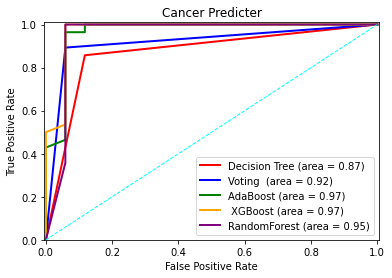

In [91]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()

plt.plot(dt_fpr, dt_tpr, color = 'red', lw = 2, label = 'Decision Tree (area = %0.2f)' % dt_AUC)
plt.plot(bag_fpr, bag_tpr, color = 'blue', lw = 2, label = 'Voting  (area = %0.2f)' % bag_AUC)
plt.plot(ada_fpr, ada_tpr, color = 'green', lw = 2, label = 'AdaBoost (area = %0.2f)' % AdaBoost_AUC)
plt.plot(XGB_fpr, XGB_tpr, color = 'orange', lw = 2, label = ' XGBoost (area = %0.2f)' % XGB_AUC)
plt.plot(rf_fpr, rf_tpr, color = 'purple', lw = 2, label = 'RandomForest (area = %0.2f)' % rf_AUC)

#Create a dotted random guess line:
plt.plot([0, 1], [0, 1], color = 'cyan', lw = 1, linestyle = '--')

# Define X and Y axes range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cancer Predicter')
plt.legend(loc = "lower right")

plt.show()

#### The best algorithm w.r.t the AUC value is XGBoost. 
#### The best algorithms w.r.t the Accuracy value are AdaBoost, XGBoost, and Random Forest. They all have a score of about 96%.
#### The best algorithm for when we want a FPR of 7% is Random Forest.